# Лабораторная работа №1

## Подключение библиотек, объявление шага и исследуемой точки

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
h_range = np.array([1/pow(2, n-1) for n in range(1, 22)])
x = 10.0
print(h_range)

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06
 9.53674316e-07]


## Определение исследуемых функций

In [38]:
def func1(x):
	return np.sin(x*x)

def func1_diff(x):
	return 2*x*np.cos(x*x)

def func2(x):
	return np.cos(np.sin(x))

def func2_diff(x):
	return np.sin(np.sin(x))*(-np.cos(x))

def func3(x):
	return np.exp(np.sin(np.cos(x)))

def func3_diff(x):
	return np.sin(x)*np.cos(np.cos(x))*(-np.exp(np.sin(np.cos(x))))

def func4(x):
	return np.log(x + 3)

def func4_diff(x):
	return 1/(x+3)

def func5(x):
	return np.sqrt(x+3)

def func5_diff(x):
	return 1/(2*np.sqrt(x+3))

## Определение исследуемого класса

In [39]:
class Function:
	func = 0
	diff = 0
	x = 0
	def __init__(self, func, diff, x):
		self.func = func
		self.diff = diff
		self.x = x
	def diff_method1(self, h):
		return (self.func(self.x+h) - self.func(self.x))/h

	def diff_method2(self, h):
		return (self.func(self.x) - self.func(self.x-h))/h

	def diff_method3(self, h):
		return (self.func(self.x+h) - self.func(self.x-h))/(2*h)

	def diff_method4(self, h):
		return 4/3 * ((self.func(self.x+h) - self.func(self.x-h))/(2*h)) -		\
			   1/3 * ((self.func(self.x+2*h) - self.func(self.x-2*h))/(4*h))

	def diff_method5(self, h):
		return 3/2 * ((self.func(self.x+h) - self.func(self.x-h))/(2*h)) -		\
			   3/5 * ((self.func(self.x+2*h) - self.func(self.x-2*h))/(4*h)) +	\
			   1/10 * ((self.func(self.x+3*h) - self.func(self.x-3*h))/(6*h))

	def get_func_err1(self):
		return np.array([np.fabs(self.diff(self.x) - self.diff_method1(h)) for h in h_range])

	def get_func_err2(self):
		return np.array([np.fabs(self.diff(self.x) - self.diff_method2(h)) for h in h_range])

	def get_func_err3(self):
		return np.array([np.fabs(self.diff(self.x) - self.diff_method3(h)) for h in h_range])

	def get_func_err4(self):
		return np.array([np.fabs(self.diff(self.x) - self.diff_method4(h)) for h in h_range])

	def get_func_err5(self):
		return np.array([np.fabs(self.diff(self.x) - self.diff_method5(h)) for h in h_range])
	
	def print_plot(self):
		fig, graph = plt.subplots(figsize = [12,5])

		graph.set_xscale('log')
		graph.set_yscale('log')

		plt.plot(h_range, self.get_func_err1(), 'r')
		plt.plot(h_range, self.get_func_err2(), 'g')
		plt.plot(h_range, self.get_func_err3(), 'b')
		plt.plot(h_range, self.get_func_err4(), 'c')
		plt.plot(h_range, self.get_func_err5(), 'm')
		plt.grid()

## График погрешностей для $\sin(x^2)$

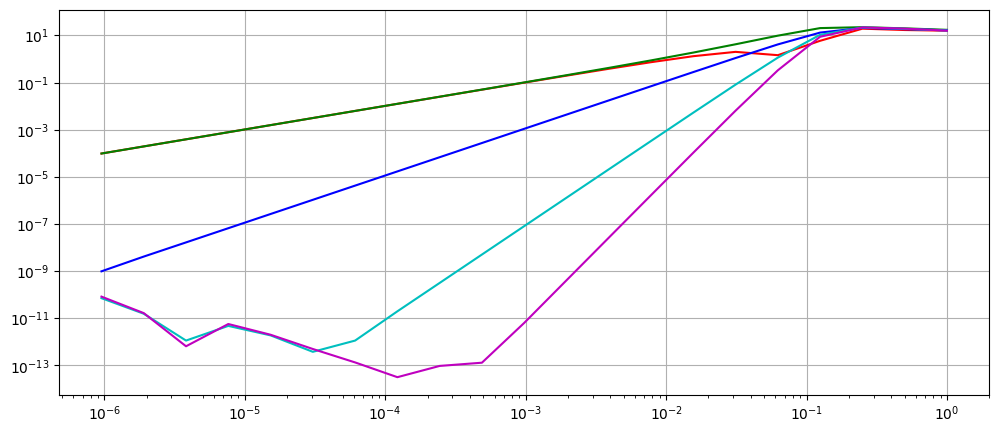

In [40]:
func1_class = Function(func1, func1_diff, x)
func1_class.print_plot()

## График погрешностей для $\cos(\sin(x))$

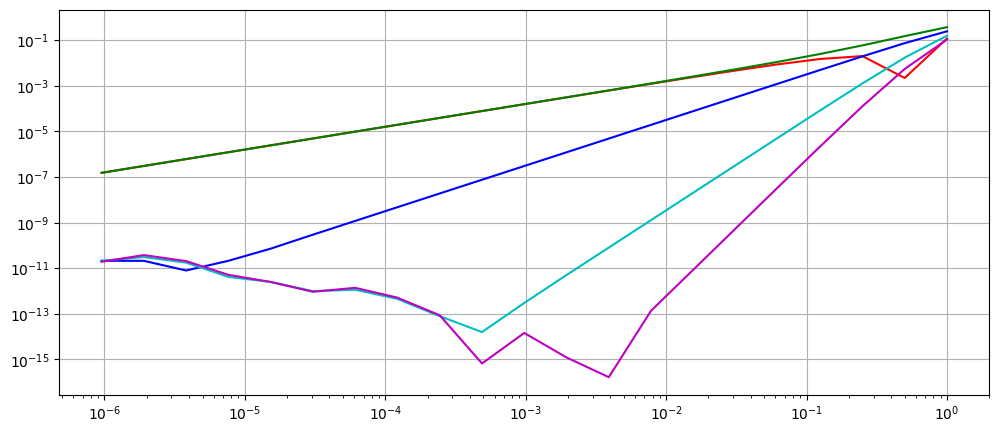

In [41]:
func2_class = Function(func2, func2_diff, x)
func2_class.print_plot()

## График погрешностей для $\exp(\sin(\cos(x)))$

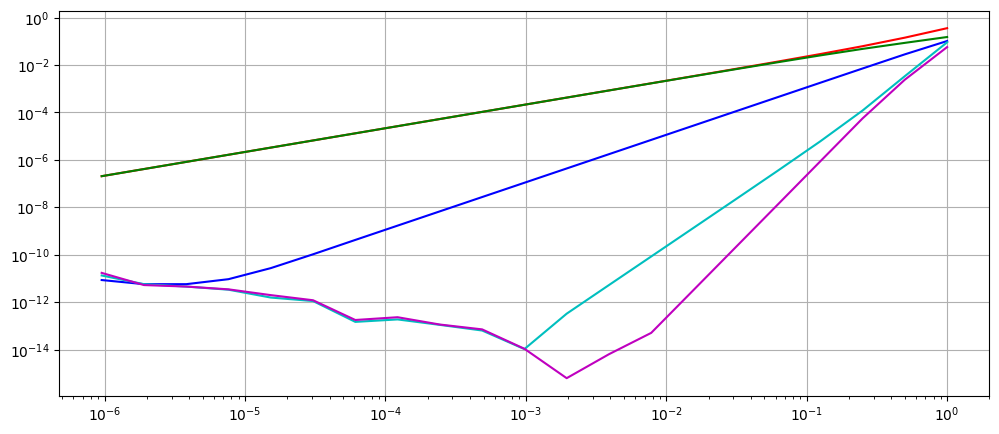

In [42]:
func3_class = Function(func3, func3_diff, x)
func3_class.print_plot()

## График погрешностей для $\ln(x+3)$

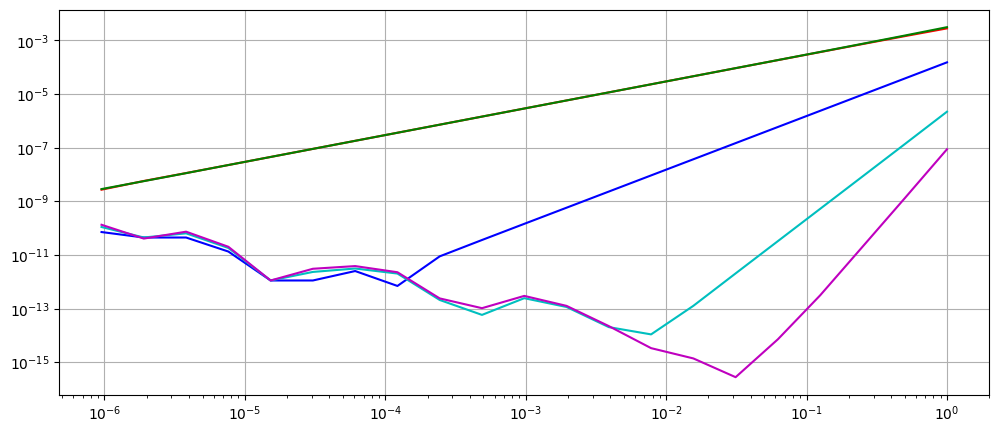

In [43]:
func4_class = Function(func4, func4_diff, x)
func4_class.print_plot()

## График погрешностей для $\sqrt{x+3}$

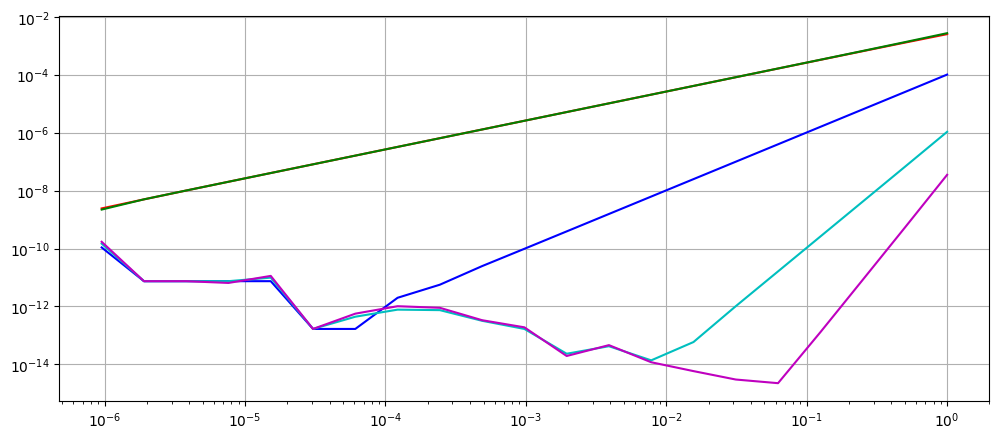

In [44]:
func5_class = Function(func5, func5_diff, x)
func5_class.print_plot()